<a href="https://colab.research.google.com/github/engrsmukhtar/AI4EnergyProcessSystems/blob/AI4EPS-1/AI%20Models/Model%201/rankprediction/rank3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Carbon Capture and Release with Neural Networks
In this notebook, we predict carbon capture and release through the conversion of CO2

In [9]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame

url="https://raw.githubusercontent.com/engrsmukhtar/AI4EnergyProcessSystems/AI4EPS-1/AI%20Models/Model%201/rankprediction/tot%20mass%20w%20H2O%20-hbrcacabo3%20-%20duration.csv"
data = pd.read_csv(url)

# Printing out some rows from our data
data[:3]

,Duration,HBr_CaC03_mass_(g),Calciner temp [C],Calciner Heater kW,Calciner Pressure ( Pa ),Calciner velocity (m/s),Calciner O2 in(perc-vol),Calciner N2 in(perc-vol),Calciner top temp ( C ),Calciner CO2 out(perc),...,Run status,Carbonator bottom temp (C),Carbonator mid temp (C),Carbonator press (pa),Carbonator velocity (m/s),Carbonator inlet CO2 (vol),Carbonator inlet N2 (vol),Carbonator outlet CO2 (vol),Carbonator top temp (C),Rank
0,1.0,4200,632.75,7.8,3216.0,0.32,40,60,450.680,0.406479,...,0,446.905,560.105,2680.0,2.5,0,100,0.0714,529.81,1
1,2.0,4200,634.72,7.8,3190.5,0.32,40,60,451.165,0.372648,...,0,446.200,558.915,2905.5,2.5,0,100,-0.1666,529.27,1
2,3.0,4200,636.50,7.8,3191.5,0.32,40,60,451.365,0.358011,...,0,445.035,558.565,2912.5,2.5,0,100,-0.2023,529.06,1


## Plotting the data

a plot of our data to see how it looks.

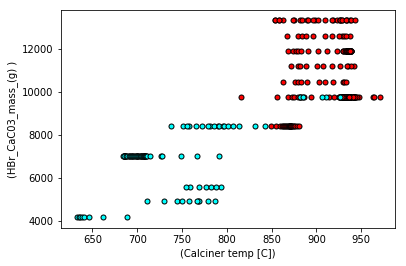

In [10]:
# Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Function to help us plot
def plot_points(data):
    X = np.array(data[["Calciner temp [C]","HBr_CaC03_mass_(g) "]])
    y = np.array(data["Rank"])
    cal = X[np.argwhere(y<=3)]
    cc = X[np.argwhere(y>3)]
    plt.scatter([s[0][0] for s in cc], [s[0][1] for s in cc], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in cal], [s[0][1] for s in cal], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('(Calciner temp [C])')
    plt.ylabel('(HBr_CaC03_mass_(g) )')
    
# Plotting the points
plot_points(data)
plt.show()

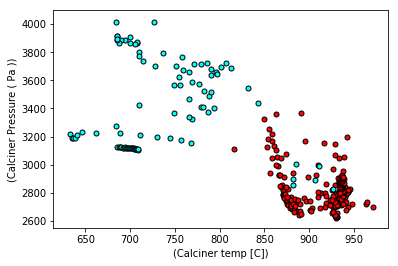

In [11]:
# Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Function to help us plot
def plot_points(data):
    X = np.array(data[["Calciner temp [C]","Calciner Pressure ( Pa )"]])
    y = np.array(data["Rank"])
    cal = X[np.argwhere(y<=3)]
    cc = X[np.argwhere(y>3)]
    plt.scatter([s[0][0] for s in cc], [s[0][1] for s in cc], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in cal], [s[0][1] for s in cal], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('(Calciner temp [C])')
    plt.ylabel('(Calciner Pressure ( Pa ))')
    
# Plotting the points
plot_points(data)
plt.show()

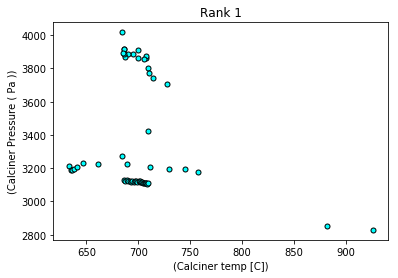

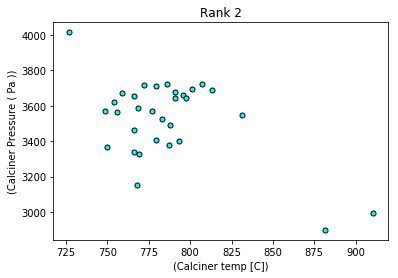

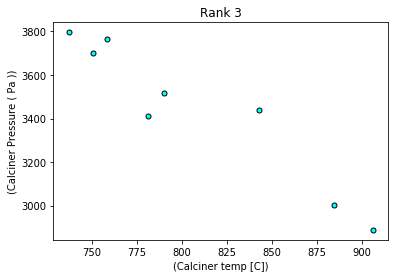

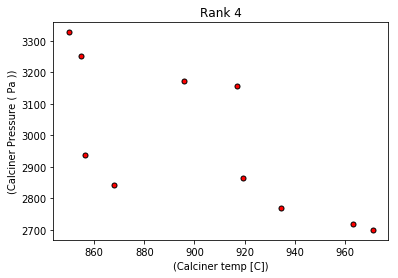

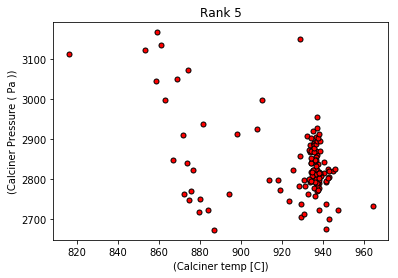

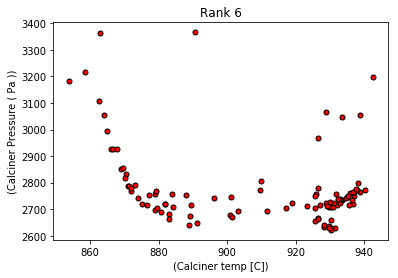

In [13]:
# Separating the ranks
data_rank1 = data[data["Rank"]==1]
data_rank2 = data[data["Rank"]==2]
data_rank3 = data[data["Rank"]==3]
data_rank4 = data[data["Rank"]==4]
data_rank5 = data[data["Rank"]==5]
data_rank6 = data[data["Rank"]==6]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()
plot_points(data_rank5)
plt.title("Rank 5")
plt.show()
plot_points(data_rank6)
plt.title("Rank 6")
plt.show()



## One-hot encoding the rank
processing the rank data

In [16]:
# Dummy variables for rank and concat existing columns
one_hot_data = pd.concat([data, pd.get_dummies(data['Rank'], prefix='Rank')], axis=1)

# Drop the previous rank column
one_hot_data = one_hot_data.drop('Rank', axis=1)
# one_hot_data = one_hot_data.drop('Calciner_CO2_in', axis=1)

# Print the first 10 rows of our data
one_hot_data[:2]

,Duration,HBr_CaC03_mass_(g),Calciner temp [C],Calciner Heater kW,Calciner Pressure ( Pa ),Calciner velocity (m/s),Calciner O2 in(perc-vol),Calciner N2 in(perc-vol),Calciner top temp ( C ),Calciner CO2 out(perc),...,Carbonator inlet CO2 (vol),Carbonator inlet N2 (vol),Carbonator outlet CO2 (vol),Carbonator top temp (C),Rank_1,Rank_2,Rank_3,Rank_4,Rank_5,Rank_6
0,1.0,4200,632.75,7.8,3216.0,0.32,40,60,450.680,0.406479,...,0,100,0.0714,529.81,1,0,0,0,0,0
1,2.0,4200,634.72,7.8,3190.5,0.32,40,60,451.165,0.372648,...,0,100,-0.1666,529.27,1,0,0,0,0,0


## Scaling the data
By dividing Each Column with it's max value

In [18]:
# Making a copy of our data
processed_data = one_hot_data[:]

# Scale the columns

col = processed_data.head()
clmn = list(col) 

for c in clmn: 
    # element of column 
    processed_data[c]  = processed_data[c]/processed_data[c].max()
print(clmn) # just to see if the list of columns are currect

# Printing the first 10 rows of our procesed data
processed_data[:2]

['Duration', 'HBr_CaC03_mass_(g) ', 'Calciner temp [C]', 'Calciner Heater kW', 'Calciner Pressure ( Pa )', 'Calciner  velocity (m/s)', 'Calciner O2 in(perc-vol)', 'Calciner N2 in(perc-vol)', 'Calciner top temp ( C )', 'Calciner CO2 out(perc)', 'Calciner O2 out(perc)', 'Calciner H2O out(perc)', 'Calciner CO out(ppm)', 'Calciner CH4 out(ppm)', 'Run status', 'Carbonator bottom temp (C)', 'Carbonator mid temp (C)', 'Carbonator press (pa)', 'Carbonator velocity (m/s)', 'Carbonator inlet CO2 (vol)', 'Carbonator inlet N2 (vol)', 'Carbonator outlet CO2 (vol)', 'Carbonator top temp (C)', 'Rank_1', 'Rank_2', 'Rank_3', 'Rank_4', 'Rank_5', 'Rank_6']


,Duration,HBr_CaC03_mass_(g),Calciner temp [C],Calciner Heater kW,Calciner Pressure ( Pa ),Calciner velocity (m/s),Calciner O2 in(perc-vol),Calciner N2 in(perc-vol),Calciner top temp ( C ),Calciner CO2 out(perc),...,Carbonator inlet CO2 (vol),Carbonator inlet N2 (vol),Carbonator outlet CO2 (vol),Carbonator top temp (C),Rank_1,Rank_2,Rank_3,Rank_4,Rank_5,Rank_6
0,0.002955,0.315008,0.651514,0.371429,0.800498,0.8,0.4,1.0,0.508467,0.010167,...,0.0,1.0,0.003597,0.768052,1.0,0.0,0.0,0.0,0.0,0.0
1,0.005909,0.315008,0.653542,0.371429,0.794151,0.8,0.4,1.0,0.509014,0.009321,...,0.0,1.0,-0.008393,0.767269,1.0,0.0,0.0,0.0,0.0,0.0


## Splitting the data into Training and Testing

In order to test our algorithm, we'll split the data into a Training and a Testing set. The size of the testing set will be 10% of the total data.

In [19]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:2])
print(test_data[:2])

Number of training samples is 301
Number of testing samples is 34
     Duration  HBr_CaC03_mass_(g)   Calciner temp [C]  Calciner Heater kW  \
307  0.920106             1.000000           0.924773            0.761905   
55   0.165667             0.527563           0.723929            0.000000   

     Calciner Pressure ( Pa )  Calciner  velocity (m/s)  \
307                  0.725327                       0.8   
55                   0.776353                       0.0   

     Calciner O2 in(perc-vol)  Calciner N2 in(perc-vol)  \
307                       1.0                       0.0   
55                        0.0                       0.0   

     Calciner top temp ( C )  Calciner CO2 out(perc)   ...    \
307                 0.987319                0.784248   ...     
55                  0.535990                0.033725   ...     

     Carbonator inlet CO2 (vol)  Carbonator inlet N2 (vol)  \
307                         0.5                       0.85   
55                          0

## Splitting the data into features and targets (labels)
 split the data into features (X) and targets (y).

In [21]:
features = train_data.drop(['Rank_1', 'Rank_2', 'Rank_3', 'Rank_4', 'Rank_5', 'Rank_6'], axis=1)
targets = train_data['Rank_1']
features_test = test_data.drop(['Rank_1', 'Rank_2', 'Rank_3', 'Rank_4', 'Rank_5', 'Rank_6'], axis=1)
targets_test = test_data['Rank_1']

print(features[:2])
print(targets[:2])

     Duration  HBr_CaC03_mass_(g)   Calciner temp [C]  Calciner Heater kW  \
307  0.920106             1.000000           0.924773            0.761905   
55   0.165667             0.527563           0.723929            0.000000   

     Calciner Pressure ( Pa )  Calciner  velocity (m/s)  \
307                  0.725327                       0.8   
55                   0.776353                       0.0   

     Calciner O2 in(perc-vol)  Calciner N2 in(perc-vol)  \
307                       1.0                       0.0   
55                        0.0                       0.0   

     Calciner top temp ( C )  Calciner CO2 out(perc)           ...             \
307                 0.987319                0.784248           ...              
55                  0.535990                0.033725           ...              

     Calciner CH4 out(ppm)  Run status  Carbonator bottom temp (C)  \
307               0.455197         1.0                     0.95844   
55                0.001773  

## Training the 2-layer Neural Network
The following function trains the 2-layer neural network. First, we'll write some helper functions.

In [0]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# Backpropagating the error
The error term is given by the equation:

$$ (y-\hat{y}) \sigma'(x) $$

In [0]:
# TODO: Write the error term formula
def error_term_formula(x, y, output):
  
    return (y - output)*sigmoid_prime(x)

In [0]:
# Neural Network hyperparameters
epochs = 500
learnrate = 0.5

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.3066451933941521
Epoch: 50
Train loss:  0.12156151922981288
Epoch: 100
Train loss:  0.07898658113314212
Epoch: 150
Train loss:  0.06135564219144924
Epoch: 200
Train loss:  0.05131163332370204
Epoch: 250
Train loss:  0.04439274133893136
Epoch: 300
Train loss:  0.03913743372141962
Epoch: 350
Train loss:  0.03493350199777742
Epoch: 400
Train loss:  0.0314667486761254
Epoch: 450
Train loss:  0.028549948574998395
Finished training!


## Calculating the Accuracy on the Test Data

In [0]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.912
